In [19]:
import os

folder_path = r'E:\AI_KDT7\12.Transfer_learning\mini\xray_img\Astrophysics\[Astro]Firecracker\Firecracker\Single_Default'  # 예: r'C:\Users\username\Documents'

# 폴더 내 모든 파일 이름 리스트
file_names = os.listdir(folder_path)

for name in file_names:
    print(name)


H_9405.40-9000_01_125.png
H_9405.40-9000_01_126.png
H_9405.40-9000_01_127.png
H_9405.40-9000_01_128.png
H_9405.40-9000_01_129.png
H_9405.40-9000_01_130.png
H_9405.40-9000_01_131.png
H_9405.40-9000_01_132.png
H_9405.40-9000_01_133.png
H_9405.40-9000_01_134.png
H_9405.40-9000_01_135.png
H_9405.40-9000_01_136.png
H_9405.40-9000_01_137.png
H_9405.40-9000_01_138.png
H_9405.40-9000_01_139.png
H_9405.40-9000_01_140.png
H_9405.40-9000_01_141.png
H_9405.40-9000_01_142.png
H_9405.40-9000_01_143.png
H_9405.40-9000_01_144.png
H_9405.40-9000_01_145.png
H_9405.40-9000_01_146.png
H_9405.40-9000_01_687.png
H_9405.40-9000_01_688.png
H_9405.40-9000_01_689.png
H_9405.40-9000_01_690.png
H_9405.40-9000_01_691.png
H_9405.40-9000_01_692.png
H_9405.40-9000_01_693.png
H_9405.40-9000_01_694.png
H_9405.40-9000_01_695.png
H_9405.40-9000_01_696.png
H_9405.40-9000_01_697.png
H_9405.40-9000_01_698.png
H_9405.40-9000_01_699.png
H_9405.40-9000_01_700.png
H_9405.40-9000_01_701.png
H_9405.40-9000_01_702.png
H_9405.40-90

In [ ]:
import os

# 기준 폴더 (여기서 파일명 추출)
base_folder = r'E:\AI_KDT7\12.Transfer_learning\mini\xray_img\Astrophysics\[Astro]Firecracker\Firecracker\Single_Default'

# 대상 폴더 (같은 이름의 xml 파일을 찾을 곳)
xml_folder = r'F:\KDT7\12_trans\team_project\xray-img\Annotation\Train\Pascal\Astrophysics'

# 1) 기준 폴더에서 확장자 뗀 파일명 리스트 만들기
base_filenames = [os.path.splitext(f)[0] for f in os.listdir(base_folder)]

# 2) 대상 폴더에서 같은 이름의 xml 파일 찾기
matched_xml_files = []

for name in base_filenames:
    xml_file = os.path.join(xml_folder, name + '.xml')
    if os.path.isfile(xml_file):
        matched_xml_files.append(xml_file)
        print(f"Found XML: {xml_file}")
    else:
        print(f"Not found XML for: {name}")

# matched_xml_files 리스트에 존재하는 xml 경로들이 저장됩니다.
len(matched_xml_files)

Found XML: E:\AI_KDT7\12.Transfer_learning\mini\xray_img\Annotation\Train\Pascal\Astrophysics\H_9405.40-9000_01_125.xml
Found XML: E:\AI_KDT7\12.Transfer_learning\mini\xray_img\Annotation\Train\Pascal\Astrophysics\H_9405.40-9000_01_126.xml
Found XML: E:\AI_KDT7\12.Transfer_learning\mini\xray_img\Annotation\Train\Pascal\Astrophysics\H_9405.40-9000_01_127.xml
Found XML: E:\AI_KDT7\12.Transfer_learning\mini\xray_img\Annotation\Train\Pascal\Astrophysics\H_9405.40-9000_01_128.xml
Found XML: E:\AI_KDT7\12.Transfer_learning\mini\xray_img\Annotation\Train\Pascal\Astrophysics\H_9405.40-9000_01_129.xml
Found XML: E:\AI_KDT7\12.Transfer_learning\mini\xray_img\Annotation\Train\Pascal\Astrophysics\H_9405.40-9000_01_130.xml
Found XML: E:\AI_KDT7\12.Transfer_learning\mini\xray_img\Annotation\Train\Pascal\Astrophysics\H_9405.40-9000_01_131.xml
Found XML: E:\AI_KDT7\12.Transfer_learning\mini\xray_img\Annotation\Train\Pascal\Astrophysics\H_9405.40-9000_01_132.xml
Found XML: E:\AI_KDT7\12.Transfer_learni

1000

In [11]:
from lxml import etree

def parse_voc_xml(xml_path):
    tree = etree.parse(xml_path)
    root = tree.getroot()

    # 이미지 파일명
    filename = root.find('filename').text

    # 객체 정보 리스트
    objects = []
    for obj in root.findall('object'):
        cls = obj.find('name').text
        bbox = obj.find('bndbox')
        xmin = int(bbox.find('xmin').text)
        ymin = int(bbox.find('ymin').text)
        xmax = int(bbox.find('xmax').text)
        ymax = int(bbox.find('ymax').text)
        objects.append({'class': cls, 'bbox': (xmin, ymin, xmax, ymax)})

    return filename, objects

# matched_xml_files 는 이전에 찾은 xml 파일 경로 리스트

for xml_file in matched_xml_files:
    filename, objects = parse_voc_xml(xml_file)
    print(f"파일명: {filename}")
    for obj in objects:
        print(f"클래스: {obj['class']}, 바운딩박스: {obj['bbox']}")
    print('---')

    
    break

파일명: H_9405.40-9000_01_125.png
클래스: Firecracker, 바운딩박스: (1209, 396, 1251, 473)
---


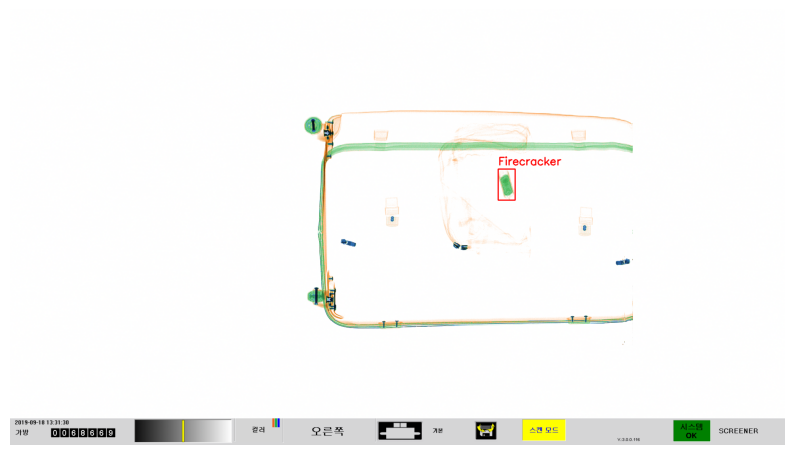

In [21]:
import os
import cv2
import matplotlib.pyplot as plt
from lxml import etree


def draw_boxes(image_path, objects):
    image = cv2.imread(image_path)
    if image is None:
        raise FileNotFoundError(f"이미지 파일을 찾을 수 없습니다: {image_path}")
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # OpenCV는 BGR이므로 RGB로 변환

    for obj in objects:
        xmin, ymin, xmax, ymax = obj['bbox']
        cls = obj['class']

        cv2.rectangle(image, (xmin, ymin), (xmax, ymax), color=(255, 0, 0), thickness=2)
        cv2.putText(image, cls, (xmin, max(ymin - 10, 0)), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    plt.axis('off')
    plt.show()

# 기준 폴더: 이미지 파일들이 있는 경로
image_folder = r'E:\AI_KDT7\12.Transfer_learning\mini\xray_img\Astrophysics\[Astro]Firecracker\Firecracker\Single_Default'

# XML 파일 리스트 (이전에 matched_xml_files 리스트가 있다면 사용)
# 예시: matched_xml_files = [목록]

for xml_file in matched_xml_files:
    filename, objects = parse_voc_xml(xml_file)

    # 이미지 경로 생성 (xml 파일과 이미지 폴더 구조에 맞게 수정)
    image_path = os.path.join(image_folder, filename)

    try:
        draw_boxes(image_path, objects)
    except FileNotFoundError as e:
        print(e)
    break



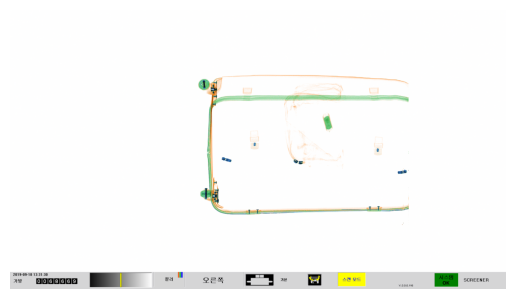

In [16]:
import cv2
import matplotlib.pyplot as plt

a = cv2.imread(r'E:\AI_KDT7\12.Transfer_learning\mini\xray_img\Astrophysics\[Astro]Firecracker\Firecracker\Single_Default\H_9405.40-9000_01_125.png')

# OpenCV는 BGR 형식이므로 RGB로 변환
a_rgb = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)

plt.imshow(a_rgb)
plt.axis('off')  # 축 숨김
plt.show()
